In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']


In [2]:
path = 'F:\\Code\\jupyter_notebook\\超导体\\Dataset\\train.csv'
# path1 = 'F:\\Code\\jupyter_notebook\\超导体\\Dataset\\unique_m.csv'
dataSet1 = pd.read_csv(path)
# dataSet2 = pd.read_csv(path1).drop(['critical_temp', 'material'], axis = 1)

# dataFrame = pd.concat([dataSet1, dataSet2], axis = 1)
dataFrame = dataSet1
dataFrame.head(5)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
# 删除一切相关联的特征，进行抽象
correlationMatrix = dataFrame.corr()
correlationFeatures = set()

for i in range(len(correlationMatrix)) :
    for j in range(i) :
        if abs(correlationMatrix.iloc[i, j]) > 0.75 :
            colname = correlationMatrix.columns[i]
            if colname != 'critical_temp' :
                correlationFeatures.add(colname)
dataFrame.drop(correlationFeatures, axis = 1, inplace = True)
dataFrame.shape

(21263, 23)

In [4]:
# 把方差低的特征剔除
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold= 0.1)
selector.fit(dataFrame)
dataFrame = pd.DataFrame(selector.transform(dataFrame), columns=dataFrame.columns[selector.get_support()])
dataFrame.head(5)

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,range_Density,...,mean_FusionHeat,range_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,range_Valence,wtd_range_Valence,critical_temp
0,4.0,88.944468,122.90607,31.794921,775.425,1010.268571,735.985714,160.25,42.914286,8958.571,...,6.9055,12.878,107.756645,61.015189,7.062488,0.308148,399.97342,1.0,1.085714,29.0
1,5.0,92.729214,122.90607,36.161939,766.440,1010.612857,743.164286,161.20,50.571429,10488.571,...,7.7844,12.878,172.205316,61.372331,16.064228,0.847404,429.97342,2.0,1.128571,26.0
2,4.0,88.944468,122.90607,35.741099,775.425,1010.820000,743.164286,160.25,49.314286,8958.571,...,6.9055,12.878,107.756645,60.943760,7.062488,0.308148,399.97342,1.0,1.114286,19.0
3,4.0,88.944468,122.90607,33.768010,775.425,1010.544286,739.575000,160.25,46.114286,8958.571,...,6.9055,12.878,107.756645,60.979474,7.062488,0.308148,399.97342,1.0,1.100000,22.0
4,4.0,88.944468,122.90607,27.848743,775.425,1009.717143,728.807143,160.25,36.514286,8958.571,...,6.9055,12.878,107.756645,61.086617,7.062488,0.308148,399.97342,1.0,1.057143,23.0


In [5]:
# # Assign default values for each data type
# defaultInt = 0
# defaultString = 'NaN'
# defaultFloat = 0.0

# # Create lists by data tpe
# intFeatures = ['number_of_elements' , 'range_atomic_radius' ,'range_Valence']

# floatFeatures = ['mean_atomic_mass', 'wtd_mean_atomic_mass',
#        'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
#        'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
#        'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
#        'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
#        'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
#        'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
#        'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
#        'wtd_entropy_atomic_radius',
#        'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
#        'mean_Density', 'wtd_mean_Density', 'gmean_Density',
#        'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
#        'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
#        'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
#        'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
#        'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
#        'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
#        'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
#        'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
#        'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
#        'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
#        'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
#        'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
#        'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
#        'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
#        'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
#        'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
#        'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
#         'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence',
#        'critical_temp']


# stringFeatures = []

# # Clean the NaN's
# for feature in dataSet1:
#     if feature in intFeatures:
#         dataSet1[feature] = dataSet1[feature].fillna(defaultInt)
#     elif feature in stringFeatures:
#         dataSet1[feature] = dataSet1[feature].fillna(defaultString)
#     elif feature in floatFeatures:
#         dataSet1[feature] = dataSet1[feature].fillna(defaultFloat)
#     else:
#         print('Error: Feature %s not recognized.' % feature)
        
# dataSet1[dataSet1==np.inf]=0.0
# dataSet1.fillna(dataSet1.mean(), inplace=True)
# dataSet1.head(5)   



In [6]:
dataSet1['critical_temp_class']='default value'
dataSet1['critical_temp_class'] = np.where(dataSet1['critical_temp'] <= 20, 'low', 'high')

dataSet1 = dataSet1.drop(['critical_temp'], axis = 1)
                                                   
dataSet1

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,range_Density,...,mean_FusionHeat,range_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,range_Valence,wtd_range_Valence,critical_temp_class
0,4,88.944468,122.90607,31.794921,775.425000,1010.268571,735.985714,160.250000,42.914286,8958.571,...,6.905500,12.878,107.756645,61.015189,7.062488,0.308148,399.97342,1,1.085714,high
1,5,92.729214,122.90607,36.161939,766.440000,1010.612857,743.164286,161.200000,50.571429,10488.571,...,7.784400,12.878,172.205316,61.372331,16.064228,0.847404,429.97342,2,1.128571,high
2,4,88.944468,122.90607,35.741099,775.425000,1010.820000,743.164286,160.250000,49.314286,8958.571,...,6.905500,12.878,107.756645,60.943760,7.062488,0.308148,399.97342,1,1.114286,low
3,4,88.944468,122.90607,33.768010,775.425000,1010.544286,739.575000,160.250000,46.114286,8958.571,...,6.905500,12.878,107.756645,60.979474,7.062488,0.308148,399.97342,1,1.100000,high
4,4,88.944468,122.90607,27.848743,775.425000,1009.717143,728.807143,160.250000,36.514286,8958.571,...,6.905500,12.878,107.756645,61.086617,7.062488,0.308148,399.97342,1,1.057143,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,146.88130,15.504479,661.775000,753.793333,427.546667,176.500000,57.808889,7511.000,...,25.700000,36.400,65.500000,111.537778,42.371302,1.029002,134.00000,1,2.168889,low
21259,5,92.266740,188.38390,7.353333,747.780000,989.819048,659.771429,159.200000,20.285714,11848.571,...,6.812400,12.878,132.805316,108.680590,17.747413,0.949904,399.97342,1,0.904762,high
21260,2,99.663190,13.51362,53.041104,733.550000,691.580000,370.180000,183.500000,124.600000,3453.000,...,21.750000,10.100,62.500000,57.400000,61.919302,0.683870,17.00000,1,3.200000,low
21261,2,99.663190,13.51362,31.115202,733.550000,706.969000,208.799000,183.500000,84.230000,3453.000,...,21.750000,10.100,62.500000,59.270000,61.919302,0.683870,17.00000,1,2.210000,low


In [7]:
# # 5.Checking for missing data

# total = dataSet1.isnull().sum().sort_values(ascending=False)
# percent = (dataSet1.isnull().sum()/dataSet1.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# missing_data


In [8]:
dataSet1.to_csv('fenlei.csv')

In [9]:
from sklearn import preprocessing

labelDict = {}
le = preprocessing.LabelEncoder()
le.fit(dataSet1['critical_temp_class'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
dataSet1['critical_temp_class'] = le.transform(dataSet1['critical_temp_class'])

# data_df['critical_temp_class']
# # 获得标签
# labelKey = 'label_' + 'critical_temp'# + feature
# labelValue = [*le_name_mapping]
# labelDict[labelKey] = labelValue

# for key, value in labelDict.items() :
#     print(key, value)
    
dataSet1.head(10)

,number_of_elements,mean_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,mean_fie,wtd_mean_fie,wtd_range_fie,mean_atomic_radius,wtd_range_atomic_radius,range_Density,...,mean_FusionHeat,range_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,entropy_ThermalConductivity,range_ThermalConductivity,range_Valence,wtd_range_Valence,critical_temp_class
0,4,88.944468,122.90607,31.794921,775.425,1010.268571,735.985714,160.25,42.914286,8958.571,...,6.9055,12.878,107.756645,61.015189,7.062488,0.308148,399.97342,1,1.085714,0
1,5,92.729214,122.90607,36.161939,766.440,1010.612857,743.164286,161.20,50.571429,10488.571,...,7.7844,12.878,172.205316,61.372331,16.064228,0.847404,429.97342,2,1.128571,0
2,4,88.944468,122.90607,35.741099,775.425,1010.820000,743.164286,160.25,49.314286,8958.571,...,6.9055,12.878,107.756645,60.943760,7.062488,0.308148,399.97342,1,1.114286,1
3,4,88.944468,122.90607,33.768010,775.425,1010.544286,739.575000,160.25,46.114286,8958.571,...,6.9055,12.878,107.756645,60.979474,7.062488,0.308148,399.97342,1,1.100000,0
4,4,88.944468,122.90607,27.848743,775.425,1009.717143,728.807143,160.25,36.514286,8958.571,...,6.9055,12.878,107.756645,61.086617,7.062488,0.308148,399.97342,1,1.057143,0
5,4,88.944468,122.90607,20.687458,775.425,1008.614286,714.450000,160.25,23.714286,8958.571,...,6.9055,12.878,107.756645,61.229474,7.062488,0.308148,399.97342,1,1.000000,0
6,4,88.944468,122.90607,10.765639,775.425,1005.857143,678.557143,160.25,15.428571,8958.571,...,6.9055,12.878,107.756645,61.586617,7.062488,0.308148,399.97342,1,0.857143,1
7,4,76.517718,122.90607,36.451199,787.050,1011.484286,742.500000,151.75,49.800000,8958.571,...,6.9055,12.878,112.006645,61.186617,8.339818,0.403693,399.97342,1,1.114286,0
8,4,76.517718,122.90607,34.833160,787.050,1011.540714,738.578571,151.75,46.842857,8958.571,...,6.9055,12.878,112.006645,61.343760,8.339818,0.403693,399.97342,1,1.100000,0
9,4,76.517718,122.90607,33.215121,787.050,1011.597143,734.657143,151.75,43.885714,8958.571,...,6.9055,12.878,112.006645,61.500903,8.339818,0.403693,399.97342,1,1.085714,0


In [10]:
dataSet1.to_csv('myIdea2.csv')

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

e=0.1515151515151516
intercept = 1.5542

sc = StandardScaler()
# sc = MinMaxScaler(feature_range=(0.1, 1), copy=False)

df = pd.read_csv('myIdea2.csv').drop('Unnamed: 0', axis = 1)
x = df.drop('critical_temp_class', axis = 1)
# apply 
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

# y = dataSet1.loc[:, ['critical_temp_class']].values
y = df['critical_temp_class'].values


# ############## bug
sc.fit(x)

# # x_scale = sc.fit_transform(x)
# x_scale = sc.transform(x)
# # x = pd.DataFrame(x_scale, columns= x.columns)
# x = x_scale

# print(y)
# y_t = y.apply(lambda x: (x**e)-intercept)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# print(y)

[[2009   81]
 [ 141 2022]]


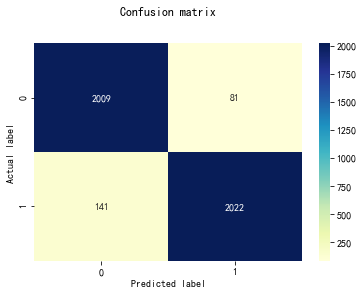

Accuracy: 0.947801551845756
Precision: 0.9614835948644793
Recall: 0.9348127600554785
F1_score: 0.9479606188466949


In [12]:
# 改变树的数量后观察模型的灵敏度
forest = RandomForestClassifier(n_estimators=200, max_features='auto')
forest.fit(x_train, y_train)

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# y_train = y_train.apply(lambda x : (x + intercept) ** (1 / e))
# y_test = y_test.apply(lambda x : (x + intercept) ** (1 / e))

y_prediction = forest.predict(x_test)
# y_prediction = pd.Series(forest.predict(x_test)).apply(lambda x: (x+intercept)**(1/e))
# y_pred_train = pd.Series(rf.predict(X_train)).apply(lambda x: (x+intercept)**(1/e))

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)
print(cnf_matrix)

import seaborn as sns

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/rf.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

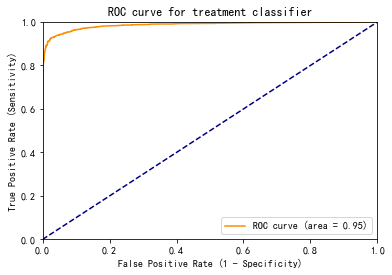

In [13]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_pred_proba = forest.predict_proba(x_test)[::, 1]

# bug
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

# print(y_test)
# print(tpr)
plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/rf_roc.png")
plt.show()

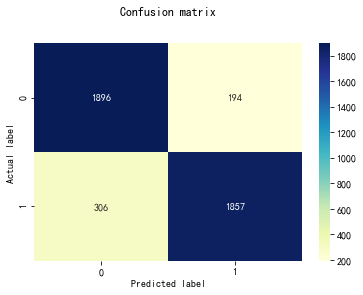

Accuracy: 0.8824359275805314
Precision: 0.9054119941491955
Recall: 0.8585298196948682
F1_score: 0.8813478879924062


In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train, y_train)
y_prediction = logreg.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/logistic_regression.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

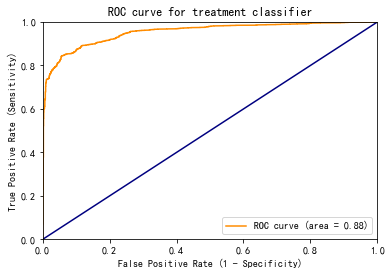

In [15]:
y_pred_proba = logreg.predict_proba(x_test)[::, 1]

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/logreg_roc.png")
plt.show()

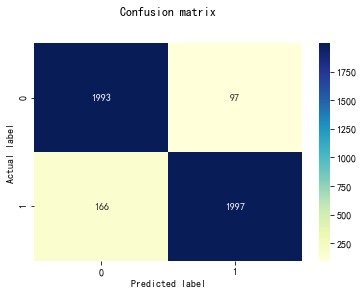

Accuracy: 0.9381612979073595
Precision: 0.9536771728748806
Recall: 0.9232547387887193
F1_score: 0.9382194033356823


In [16]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = neighbors.KNeighborsClassifier()

knn.fit(x_train, y_train)
y_prediction = knn.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap = 'YlGnBu', fmt = 'g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/KNeighbors.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

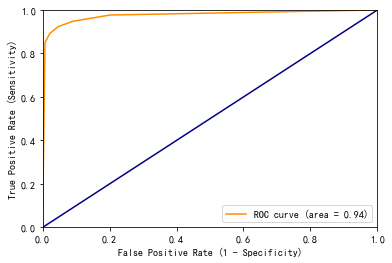

In [17]:
y_pred_proba = knn.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/KNeighbors_roc.png")
plt.show()

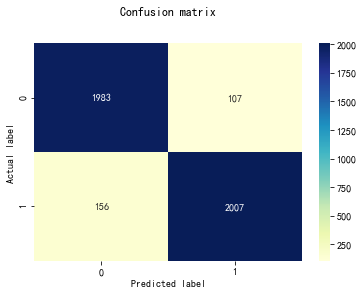

Accuracy: 0.9381612979073595
Precision: 0.9493850520340587
Recall: 0.9278779472954231
F1_score: 0.9385083002104279


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)

y_prediction = tree.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt = 'g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/tree.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

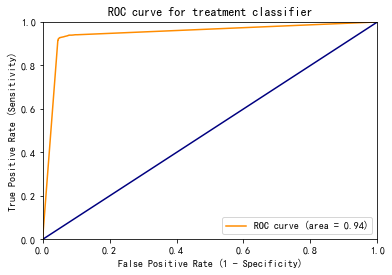

In [19]:
y_pred_proba = tree.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/tree_roc.png")
plt.show()

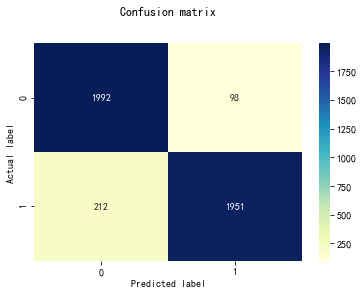

Accuracy: 0.9271102750999295
Precision: 0.9521717911176184
Recall: 0.9019879796578826
F1_score: 0.9264007597340932


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
# GBoost = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.05, 
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_impurity_split=10,
#                                    random_state=42)
GBoost = GradientBoostingClassifier()
GBoost.fit(x_train, y_train)
y_prediction = GBoost.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/GBoost.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

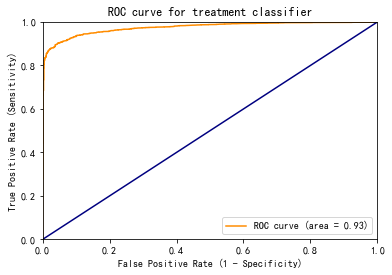

In [21]:
y_pred_proba = GBoost.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/GBoost_roc.png")
plt.show()

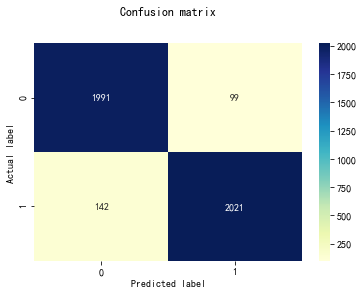

Accuracy: 0.9433341170938161
Precision: 0.9533018867924529
Recall: 0.9343504392048081
F1_score: 0.9437310296521131


In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=200,
                        learning_rate=0.8)
ada.fit(x_train, y_train)

y_prediction = ada.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/ada.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

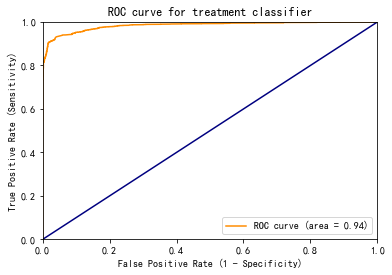

In [23]:
y_pred_proba = ada.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/ada_roc.png")
plt.show()

[19:51:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9445097578180108
Precision: 0.961225466730493
Recall: 0.9283402681460934
F1_score: 0.9444967074317967


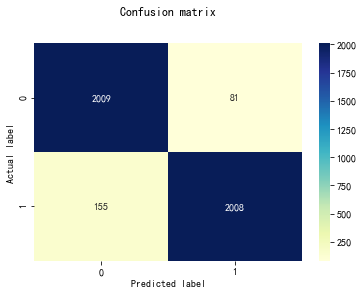

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train, y_train,
        eval_set = [(x_test, y_test)], verbose = False)
y_prediction = xgb.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/xgb.png")

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

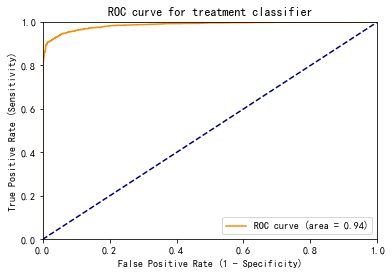

In [25]:
y_pred_proba = xgb.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/xgb_roc.png")
plt.show()

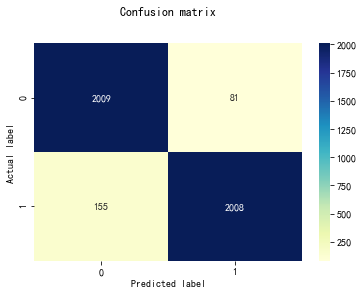

Accuracy: 0.9445097578180108
Precision: 0.961225466730493
Recall: 0.9283402681460934
F1_score: 0.9444967074317967


In [26]:
from sklearn.svm import LinearSVC
svm = LinearSVC()

svm.fit(x_train, y_train)
svm.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/svm.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

In [27]:
# y_pred_proba = svm.predict_proba(x_test)[::, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# auc = metrics.roc_auc_score(y_test, y_prediction)

# plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
# plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '-')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])

# plt.title("ROC curve for treatment classifier")

# plt.show()

Accuracy: 0.9445097578180108
Precision: 0.961225466730493
Recall: 0.9283402681460934
F1_score: 0.9444967074317967


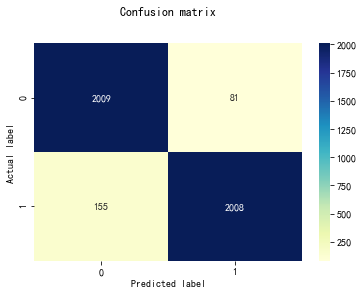

In [28]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator=tree, n_estimators=200, 
                       max_samples=1.0, max_features=1.0, bootstrap_features=False, n_jobs=1, random_state=1)
bag.fit(x_train, y_train)

bag.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/bag.png")

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

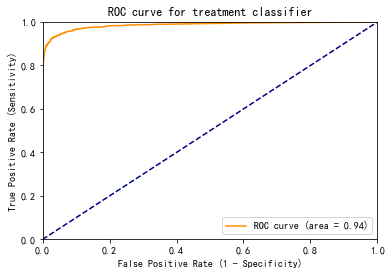

In [29]:
y_pred_proba = bag.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/bag_roc.png")
plt.show()

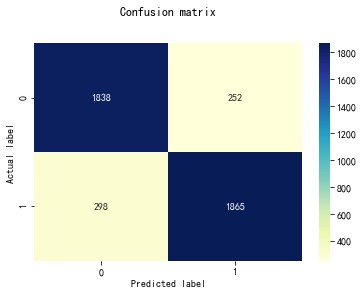

Accuracy: 0.8706795203385845
Precision: 0.8809636277751535
Recall: 0.8622283865002311
F1_score: 0.8714953271028039


In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train, y_train)
y_prediction = gnb.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/gnb.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

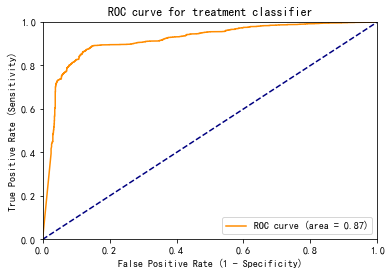

In [31]:
y_pred_proba = gnb.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/gnb_roc.png")
plt.show()

[19:52:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


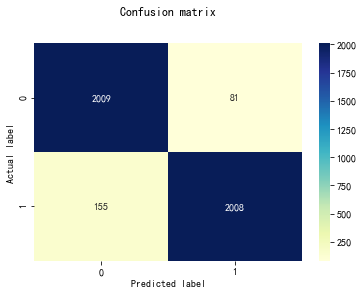

Accuracy: 0.9445097578180108
Precision: 0.961225466730493
Recall: 0.9283402681460934
F1_score: 0.9444967074317967


In [32]:
from mlxtend.classifier import StackingClassifier

stregr = StackingClassifier(classifiers=[gnb, logreg, xgb], meta_classifier=tree)

stregr.fit(x_train, y_train)
y_prediction = stregr.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/stack.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

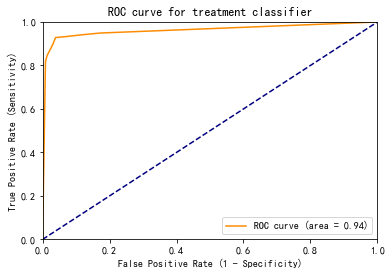

In [33]:
y_pred_proba = stregr.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/stack_roc.png")
plt.show()

0.9049970605526161 {'ridge__alpha': 1.0}


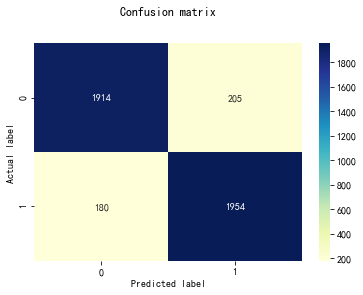

Accuracy: 0.9094756642370092
Precision: 0.905048633626679
Recall: 0.915651358950328
F1_score: 0.9103191241556021


In [34]:
from mlxtend.classifier import StackingCVClassifier
from mlxtend.data import boston_housing_data
from sklearn.linear_model import PassiveAggressiveClassifier, RidgeClassifier, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# 初始化基模型
pa = PassiveAggressiveClassifier()
ridge = Ridge(random_state=2020, ) 
# lasso =Lasso()
forest = RandomForestClassifier()
gbr = GradientBoostingClassifier()
tree = DecisionTreeClassifier()

models = [ridge, forest, gbr, tree]

params = {
#     'lasso__alpha': [0.1, 1.0, 10.0],
          'ridge__alpha': [0.1, 1.0, 10.0]}

sclf = StackingCVClassifier(classifiers=models, meta_classifier=tree)
grid = GridSearchCV(estimator=sclf, param_grid=params, cv=5, refit=True)
grid.fit(x_train, y_train.astype('int'))
print(grid.best_score_, grid.best_params_)

y_prediction = grid.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_prediction)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("photos/classification/stackingCVC.png")
plt.show()

print("Accuracy:", metrics.accuracy_score(y_test, y_prediction))
print("Precision:", metrics.precision_score(y_test, y_prediction))
print("Recall:", metrics.recall_score(y_test, y_prediction))
print("F1_score:", metrics.f1_score(y_test, y_prediction))

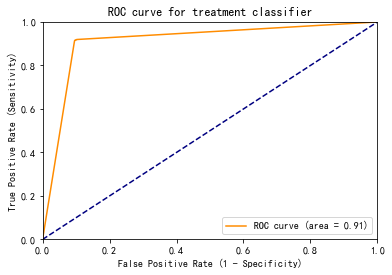

In [35]:
y_pred_proba = grid.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_prediction)

plt.plot(fpr, tpr, color = 'darkorange', label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.title("ROC curve for treatment classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')   
plt.legend()
plt.savefig("photos/classification/stackingCVC_roc.png")
plt.show()